<br>
<h1><b><center><font color="green">Green</font> Taxi </center></b></h1><h5><center>Data Wizards Team </center></h5><br>
<img align="center" src="Working_Code_Images/green-cab-markings.jpg" style="height:100px">

In [4]:
# Import the necessary libraries for our code
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To see all columns in a DataFrame
pd.options.display.max_columns = None

# To see all column content
pd.options.display.width = 0
pd.set_option('display.max_rows', 500)


<img align="center" src="Working_Code_Images/crisp-dm.png" style="height:400px"> 

<br>
<b><font color="red">The CRISP-DM Approach </font></u></b><br>- We will follow CRISP-DM Framework during this project.



<img align="left" src="Working_Code_Images/Idea.jpg" style="height:200px"> 


<b><font color="Blue">Business Understanding</font></u></b><br>- Calculate the Trip Duration<br>- Calculate the Trip Fare based on the duration<br>- Customer click on the Source and Destination and he gets an estimate duration for his journy

In [2]:
# Define the folder location of our dataset
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"

In [3]:
# We will load all the data at the begining to plot it to analyze the data and decide how we can work on it
# The %timeit will help us get an estimate of how long did it take to load our dataset
Green_Taxi = pd.read_csv(location+'2016_Green_Taxi_Trip_Data.csv')


 <img align="left" src="Working_Code_Images/DataPreparation.jpg" style="height:200px"> 


<b><font color="Blue">Data Preparation</font></u></b><br>- Calculate the Trip Duration<br>- Calculate the Trip Fare based on the duration<br>- Customer click on the Source and Destination and he gets an estimate duration for his journy

<img align="left" src="Working_Code_Images/timetoplan.png" style="height:200px"> 

<font color="red"><b>The Data Preparation Plan</b></font><br> <b>&nbsp;&nbsp;Step 1.</b> Data Cleansing and Data Wranglering <br><b>&nbsp;&nbsp;Step 2.</b> EDA (Explanatory Data Analysis) to understand our data, Use Box Plot , PVALUE and the describe &nbsp;&nbsp;command to identify the outliers and remove them<br><b>&nbsp;&nbsp;Step 3.</b> Plot the data and do some statistics to learn more about the data<br><b>&nbsp;&nbsp;Step 4.</b> Feature Engineering by dropping unnesessary columns and merge some columns also add new &nbsp;&nbsp;columns when needed

<b> Step 1</b><br>
<b> Data Cleansing</b>

<img align="left" src="Working_Code_Images/data-cleaning.png" style="height:200px"> 


In [4]:
# Check the number of records and columns in the dataset also the total memory usage
Green_Taxi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16385532 entries, 0 to 16385531
Data columns (total 23 columns):
VendorID                 int64
lpep_pickup_datetime     object
Lpep_dropoff_datetime    object
Store_and_fwd_flag       object
RateCodeID               int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type             int64
Trip_type                float64
PULocationID             float64
DOLocationID             float64
dtypes: float64(16), int64(4), object(3)
memory usage: 2.8+ GB


<font color="red"><u>We have observed the following: <u/></b></font><br> 
<font color="red">- The total number of records is <b>16,385,532 </b></font><br>
<font color="red">- Some data are categorial and may need to be hotencoded it we will use it in our model <br>
<font color="red">- The total number of colums is <b>23 column </b><font><br>
<font color="red">- The total memory usage is <b>2.8+ GB </b></font><br>
<font color="red">- The first 3 columns are the only non numerical columns in our dataset so there might be no much special characters cleaning as the 3 columns are 2 dates and a flag, and the rest is already float or int</b></font>

In [5]:
# Check part of the data to know what columns we might not need at all
Green_Taxi[:2]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,PULocationID,DOLocationID
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,NaN,0.3,11.16,1,1.0,NaN,NaN
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1.0,NaN,NaN


<font color="red">We have noticed that the columns " Ehail_fee , PULocationID , DOLocationID " are nulls, so we will drop them

In [ ]:
Green_Taxi.drop(columns =['Ehail_fee' , 'PULocationID' , 'DOLocationID'], inplace = True) 


<font color="red">Based on experience to have accurate measurments with the .describe() command and the EDAs, the target columns should not have null value,<br> so our plan now is as follows: <br>- The columns that can not have 0 as a value ex. Pickup_longitude we will be removed <br> - The columns that can have 0 or average as a value will be kept and their values will be replaced</font>

In [8]:
def checkNulls(col):
    #print("There are {} null values in column "+col.format(Green_Taxi[col][Green_Taxi[col].isnull()].count()))
    print (col.ljust(25) +": {} ".format(Green_Taxi[col][Green_Taxi[col].isnull()].count()))

In [9]:
# Test
checkNulls('lpep_pickup_datetime')
 

lpep_pickup_datetime     : 0 


In [10]:
# Check nulls in every column
for col in Green_Taxi.columns:
    checkNulls(col)

VendorID                 : 0 
lpep_pickup_datetime     : 0 
Lpep_dropoff_datetime    : 0 
Store_and_fwd_flag       : 0 
RateCodeID               : 0 
Pickup_longitude         : 0 
Pickup_latitude          : 0 
Dropoff_longitude        : 0 
Dropoff_latitude         : 0 
Passenger_count          : 0 
Trip_distance            : 0 
Fare_amount              : 0 
Extra                    : 0 
MTA_tax                  : 0 
Tip_amount               : 0 
Tolls_amount             : 0 
improvement_surcharge    : 0 
Total_amount             : 0 
Payment_type             : 0 
Trip_type                : 0 


In [11]:
Green_Taxi= Green_Taxi.dropna()

In [12]:
Green_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9017586 entries, 0 to 9018661
Data columns (total 20 columns):
VendorID                 int64
lpep_pickup_datetime     object
Lpep_dropoff_datetime    object
Store_and_fwd_flag       object
RateCodeID               int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
improvement_surcharge    float64
Total_amount             float64
Payment_type             int64
Trip_type                float64
dtypes: float64(13), int64(4), object(3)
memory usage: 1.4+ GB


<font color="red"><u>We have observed the following: <u/></b></font><br> 
<font color="red">- The total number of records decreased to <b>9,018,661 </b></font><br>
<font color="red">- The total number of colums is now <b>20 column </b><font><br>
<font color="red">- The total memory usage decreased to <b>1.4+ GB </b></font><br>


<font color="red"> We will do the same thing now but for the Zero values <br>

In [13]:
def checkZeros(col):
    print (col.ljust(25) +": {} ".format(Green_Taxi[col][Green_Taxi[col]==0].count()))


In [14]:
# Test
print("There are {} trip records with 0 km distance".format(Green_Taxi.Trip_distance[Green_Taxi.Trip_distance == 0 ].count()))

There are 118406 trip records with 0 km distance


In [15]:
# Check nulls in every column
for col in Green_Taxi.columns:
    checkZeros(col)

VendorID                 : 0 
lpep_pickup_datetime     : 0 
Lpep_dropoff_datetime    : 0 
Store_and_fwd_flag       : 0 
RateCodeID               : 0 
Pickup_longitude         : 14720 
Pickup_latitude          : 14719 
Dropoff_longitude        : 12535 
Dropoff_latitude         : 12535 
Passenger_count          : 2753 
Trip_distance            : 118406 
Fare_amount              : 24870 
Extra                    : 4203506 
MTA_tax                  : 209538 
Tip_amount               : 5173086 
Tolls_amount             : 8847500 
improvement_surcharge    : 207577 
Total_amount             : 23617 
Payment_type             : 0 
Trip_type                : 0 


<font color="red"> The resulting values are interesting as there were many important columns have zero values that should be removed ex. Pickup_longitude and Dropoff_longitude so we will remove these rows.

In [16]:
Green_Taxi.shape

(9017586, 20)

In [17]:
# I found the below code the simplist way to delete the Zero rows
Green_Taxi = Green_Taxi[Green_Taxi.Pickup_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Pickup_latitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Dropoff_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Dropoff_latitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Passenger_count != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Trip_distance != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Fare_amount != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Total_amount != 0]

In [18]:
# Notice the number of records decreased
Green_Taxi.shape

(8867131, 20)

<font color="red">
- We will also remove values where lpep_pickup_datetime == Lpep_dropoff_datetime <b>OR</b> lpep_pickup_datetime < Lpep_dropoff_datetime <br>
- <b>Based on experience it is better to change their format from object to date first to make the operation much faster</b><br>
- We will also create a new column Trip_Duration which will be used later in our desired model<br>

In [19]:
Green_Taxi[:2]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0
1,2,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0


<font color="red"> Based on our analysis the format used for lpep_pickup_datetime is <b>01/01/2016 12:29:24 AM </b> we will use a similat format in our code
        

In [20]:
# Good String Character to Date Conversion example for testing

from datetime import datetime
datetime_str = '2016-06-22 23:07:36'
datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
print(type(datetime_object))
print(datetime_object)  # printed in default format

datetime_str = '01/01/2016 12:29:24 AM'
datetime_object = datetime.strptime(datetime_str, '%m/%d/%Y %I:%M:%S %p')
print(datetime_object)  # printed in default format


<class 'datetime.datetime'>
2016-06-22 23:07:36
2016-01-01 00:29:24


<font color="red"> Now apply the same example on the desired columns

In [21]:
Green_Taxi.iloc[:, 1:3][:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime
0,01/01/2016 12:29:24 AM,01/01/2016 12:39:36 AM
1,01/01/2016 12:19:39 AM,01/01/2016 12:39:18 AM


In [22]:
# VIP: The step below is very important to change from String to Datetime
# Note when converting String to Datetime it is very important to specify the exact format as 
# it makes is much faster to process the request. Also, anyother option makes the process hang

# The line below just for testing
# %timeit pd.to_datetime(Green_Taxi.lpep_pickup_datetime, format='%m/%d/%Y %I:%M:%S %p')

# The command iloc to specify the columns that we would like to work on
%timeit Green_Taxi.iloc[:, 1:3] = Green_Taxi.iloc[:, 1:3].apply(pd.to_datetime, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


34.6 s ± 554 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<font color="red"> Now Create the Trip_Duration column

In [23]:
Green_Taxi['Trip_Duration'] = (Green_Taxi['Lpep_dropoff_datetime'] - Green_Taxi['lpep_pickup_datetime'])


<font color="red">
- Time to remove values where lpep_pickup_datetime == Lpep_dropoff_datetime <b>OR</b> lpep_pickup_datetime < Lpep_dropoff_datetime 

In [24]:
Green_Taxi = Green_Taxi[Green_Taxi.lpep_pickup_datetime != Green_Taxi.Lpep_dropoff_datetime]
Green_Taxi = Green_Taxi[Green_Taxi.lpep_pickup_datetime < Green_Taxi.Lpep_dropoff_datetime]

<font color="red"> For safety we will save the file for future use. Also, note we are mentioning the dateFormat as the Date Columns will not be saved by default. La yolda3 el Mo2men men Go7rn toltomyt marah!

In [ ]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B2.csv', date_format='%m/%d/%Y %I:%M:%S %p',index=False)


<b>Continue Working from here

In [ ]:
Green_Taxi = pd.read_csv(location+'Green_Taxi_B2.csv')

We've further examined our dataset and here is our understanding for the current columns

<b>VendorID</b><br>
A code indicating the LPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.


<b>RateCodeID</b><br>
The final rate code in effect at the end of the trip.<br>
1= Standard rate<br>
2=JFK<br>
3=Newark<br>
4=Nassau or Westchester<br>
5=Negotiated fare<br>
6=Group ride

<b>store_and_fwd_flag</b><br>
This flag indicates whether the trip record was held in vehicle memory before sending <br>
to the vendor because the vehicle did not have a connection to the server - Y=store and forward; <br>
N=not a store and forward trip

<b>Payment_type</b><br>
A numeric code signifying how the passenger paid for the trip.<br>
1= Credit card<br>
2= Cash<br>
3= No charge<br>
4= Dispute<br>
5= Unknown<br>
6= Voided trip

<b>Fare_amount</b><br>
The time-and-distance fare calculated by the meter.<br>

<b>Extra</b><br>
Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 rush hour and overnight charges.<br>

<b>MTA_tax</b><br>
0.50 MTA tax that is automatically triggered based on the metered rate in use.

<b>Improvement_surcharge</b><br>
0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.<br>

<b>Tip_amount</b><br>
Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.<br>

<b>Tolls_amount</b><br>
Total amount of all tolls paid in trip.<br>

<b>Total_amount</b><br>
The total amount charged to passengers. Does not include cash tips.<br>

<b>Trip_type</b><br>
A code indicating whether the trip was a street-hail or a dispatch<br>
that is automatically assigned based on the metered rate in use but<br>
can be altered by the driver.<br>
1= Street-hail<br>
2= Dispatch<br>

<font color="red"> <b>Conclusion: </b></font><br>
A- Subtract the Tip_amount from the Total_amount<br>
B- The follwing rows should be deleted from the dataset
(RateCodeID in (2,3,4,5,6),store_and_fwd_flag = Y, Payment_type in (3,4,5,6),Trip_type = 2,Tolls_amount)<br>
C- The following columns should be dropped (VendorID, RateCodeID,store_and_fwd_flag,Fare_amount,Extra,MTA_tax,
Improvement_surcharge,Tip_amount,Tolls_amount,Trip_type)<br>

In [ ]:
#Green_Taxi[Green_Taxi['Trip_type '] == 2].count()

In [ ]:
#Green_Taxi[Green_Taxi['MTA_tax']>0]

In [ ]:
#Green_Taxi[Green_Taxi['RateCodeID'] == 6]


In [25]:
Green_Taxi.shape

(8866405, 21)

In [ ]:
#Green_Taxi[Green_Taxi['Payment_type'] == 1][:4]

<b>Start working on the plan</b>

<b> A- Subtract the Tip_amount from the Total_amount<br>

In [26]:
Green_Taxi['Final_Fare_amount'] = Green_Taxi['Total_amount'] - Green_Taxi['Tip_amount'].astype(float)

<b> B- The following rows should be deleted from the dataset
(RateCodeID in (2,3,4,5,6),store_and_fwd_flag = Y, Payment_type in (3,4,5,6),Trip_type = 2,Tolls_amount)<br>

In [28]:
Green_Taxi = Green_Taxi[Green_Taxi['RateCodeID'] == 1]
Green_Taxi = Green_Taxi[Green_Taxi['Store_and_fwd_flag'] == 'N']
Green_Taxi = Green_Taxi[Green_Taxi.Payment_type.isin([1,2])]
Green_Taxi = Green_Taxi[Green_Taxi['Trip_type '] == 1]
Green_Taxi = Green_Taxi[Green_Taxi['Tolls_amount'] == 0]


In [29]:
Green_Taxi[:2]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_Duration,Final_Fare_amount
0,2,2016-01-01 00:29:24,2016-01-01 00:39:36,N,1,-73.928642,40.680611,-73.924278,40.698044,1,1.46,8.0,0.5,0.5,1.86,0.0,0.3,11.16,1,1.0,00:10:12,9.3
1,2,2016-01-01 00:19:39,2016-01-01 00:39:18,N,1,-73.952675,40.723175,-73.923920,40.761379,1,3.56,15.5,0.5,0.5,0.00,0.0,0.3,16.80,2,1.0,00:19:39,16.8


In [30]:
Green_Taxi.shape

(8473169, 22)

<b>C- The following columns should be dropped (VendorID, RateCodeID,Store_and_fwd_flag,Fare_amount,Extra,MTA_tax,
Improvement_surcharge,Tip_amount,Tolls_amount,Trip_type,Total_amount)<br>

In [32]:
Green_Taxi.drop(columns =['VendorID','RateCodeID','Store_and_fwd_flag','Fare_amount', \
'Extra','MTA_tax','improvement_surcharge','Tip_amount','Tolls_amount','Trip_type ','Total_amount','Trip_Duration'], inplace = True) 


In [33]:
Green_Taxi.shape


(8473169, 10)

In [ ]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B3.csv',index=False)
#Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B3.csv', date_format='%m/%d/%Y %I:%M:%S %p',index=False)

In [34]:
Green_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8473169 entries, 0 to 9018661
Data columns (total 10 columns):
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Payment_type             int64
Final_Fare_amount        float64
dtypes: datetime64[ns](2), float64(6), int64(2)
memory usage: 711.1 MB


<font color="red"><u>We have observed the following: <u/></b></font><br> 
<font color="red">- The total number of records decreased to <b>9,018,661</b></font><br>
<font color="red">- The total number of colums is now <b>10 column </b><font><br>
<font color="red">- The total memory usage decreased to <b>711.1 MB </b></font><br>


<b> Step 2 (Cont.)<br>
<b> Exploratory Data Analysis (EDA)</b><br>

<img src="Working_Code_Images/EDA.jpg" style="height:200px"> 


In [ ]:
#### INTERNET EXAMPLE
# Define the folder location of our dataset
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"

In [ ]:
# VIP to be able to read Date Columns
#parse_dates = ['lpep_pickup_datetime', 'Lpep_dropoff_datetime']
#dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

Green_Taxi = pd.read_csv(location+'Green_Taxi_B3.csv')#,date_parser=dateparse)

In [ ]:
Green_Taxi.iloc[:, 0:2] = Green_Taxi.iloc[:, 0:2].apply(pd.to_datetime, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


In [35]:
Green_Taxi['Trip_Duration'] = (Green_Taxi['Lpep_dropoff_datetime'] - Green_Taxi['lpep_pickup_datetime'])
Green_Taxi['Trip_Duration'] = Green_Taxi['Trip_Duration']/np.timedelta64(1,'s')


In [36]:
Green_Taxi[:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8,1179.0


In [37]:
Green_Taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8473169 entries, 0 to 9018661
Data columns (total 11 columns):
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count          int64
Trip_distance            float64
Payment_type             int64
Final_Fare_amount        float64
Trip_Duration            float64
dtypes: datetime64[ns](2), float64(7), int64(2)
memory usage: 775.7 MB


<font color="red"> To make a quick analysis we will first use the .describe() command. 
    For better reading we will transpose it describe().T

In [38]:
Green_Taxi.describe().T

,count,mean,std,min,25%,50%,75%,max
Pickup_longitude,8473169.0,-73.939500,0.270832,-115.282494,-73.961578,-73.947517,-73.919617,-67.897514
Pickup_latitude,8473169.0,40.745674,0.063910,36.011406,40.693951,40.745724,40.800385,43.168007
Dropoff_longitude,8473169.0,-73.938177,0.272178,-115.332214,-73.968666,-73.946442,-73.914108,-49.323128
Dropoff_latitude,8473169.0,40.744011,0.065152,17.847042,40.695251,40.745625,40.788551,48.119473
Passenger_count,8473169.0,1.359636,1.030636,1.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,8473169.0,2.704385,2.609131,0.010000,1.060000,1.840000,3.410000,832.200000
Payment_type,8473169.0,1.494996,0.499975,1.000000,1.000000,1.000000,2.000000,2.000000
Final_Fare_amount,8473169.0,12.825725,8.182847,-19.300000,7.300000,10.300000,15.800000,3349.300000
Trip_Duration,8473169.0,1319.617367,6628.318317,1.000000,365.000000,605.000000,996.000000,86399.000000


<B>There is a lot of interesting things that we can notice before even plotting the data, below are some of our observation: 
</B><br>
A- The data has some wrong coordinates, as NYC has a positive latitude and a negative longitude .<i>
  "we will filter the correct coordinates later using our coordinates geojson program that we have developed before"</i><br>
B- for the Passenger_count we have cases with 9 passengers which is irrational for the Green Taxi <br>
C- Trip_distance max distance is 832.2 which is irrational. <br>
D- Final_Fare_amount has min value of -14.8 and max of 3349.3 which is also not realistic <br>
E- Trip_Duration has some values for trips that took almost a day (86399 secs = 23.99 H)

In [40]:
# That code was working when there were some categorial data in the dataset
#from plotly.offline import init_notebook_mode, iplot
#import plotly.figure_factory as ff
# VendorID, RateCodeID, Payment_type, Trip_type
# Hint: include=['O'] stands for datatype object
#table_cat = ff.create_table(Green_Taxi.describe(include=['O']).T, index=True, index_title='Categorical columns')
#iplot(table_cat)


In [41]:
# We've also noticed below that we have some records with coordinates 0 which is also incorrect
# So we will remove them as well
Green_Taxi.sort_values(by='Passenger_count')[:5]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0
5758401,2016-04-24 10:46:43,2016-04-24 10:54:00,-73.947487,40.747997,-73.945969,40.766029,1,1.49,1,7.8,437.0
5758400,2016-04-24 10:41:22,2016-04-24 10:43:03,-73.935707,40.761108,-73.942314,40.754219,1,0.45,1,4.3,101.0
5758399,2016-04-24 10:32:29,2016-04-24 10:56:33,-73.956970,40.747856,-74.002922,40.726761,1,6.32,1,23.3,1444.0
5758398,2016-04-24 10:45:02,2016-04-24 10:54:40,-73.872040,40.751183,-73.863708,40.748772,1,0.68,1,8.3,578.0


In [42]:
#Around 119K  trip record with distance equal to 0. Below are some possible explanation for such records.
#Customer changed mind and cancelled the journey just after accepting it.
#Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
#Issue with GPS tracker while the journey is being finished.
#Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start
#Or some other issue with the software itself which a technical guy can explain

print("There are {} trip records with 0 km distance".format(Green_Taxi.Trip_distance[Green_Taxi.Trip_distance == 0 ].count()))


There are 0 trip records with 0 km distance


In [43]:
Green_Taxi = Green_Taxi[Green_Taxi.Trip_distance != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Pickup_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Dropoff_longitude != 0]
Green_Taxi = Green_Taxi[Green_Taxi.Trip_Duration != 0]

In [44]:
Green_Taxi.Passenger_count.unique()


array([1, 2, 6, 5, 4, 3, 7, 9, 8], dtype=int64)

In [45]:
# Let's remove all values for Passenger_count >4
Green_Taxi = Green_Taxi[Green_Taxi.Passenger_count.isin([1,2,3,4])]


In [46]:
Green_Taxi.Passenger_count.unique()

array([1, 2, 4, 3], dtype=int64)

<b>Detecting Outliers using boxplot

In [47]:
# Detecting Outliers
#~Green_Taxi.columns.isin(['lpep_pickup_datetime', 'Lpep_dropoff_datetime'])
Green_Taxi.columns


Index(['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Payment_type', 'Final_Fare_amount',
       'Trip_Duration'],
      dtype='object')

In [48]:
def boxplt(x):
    plt.figure(figsize = (20,5))
    sns.boxplot(Green_Taxi[x])
    plt.show()

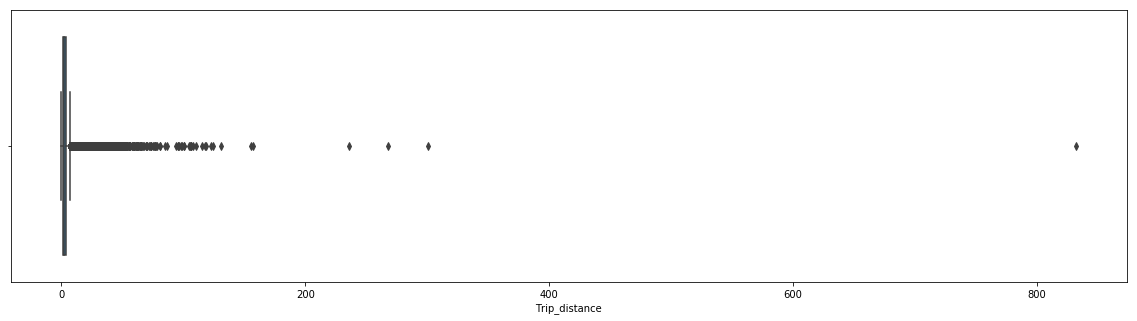

In [49]:
boxplt('Trip_distance')


In [50]:
Green_Taxi_Bk = Green_Taxi.copy()

In [51]:
def quntile(x):
    Q1 = Green_Taxi[x].quantile(0.25)
    Q3 = Green_Taxi[x].quantile(0.75)
    IQR = Q3 - Q1

    filter = (Green_Taxi[x] >= Q1 - 1.5 * IQR) & (Green_Taxi[x] <= Q3 + 1.5 *IQR)
    Test = Green_Taxi.loc[filter]
    return Test

In [52]:
Green_Taxi= quntile('Trip_distance')

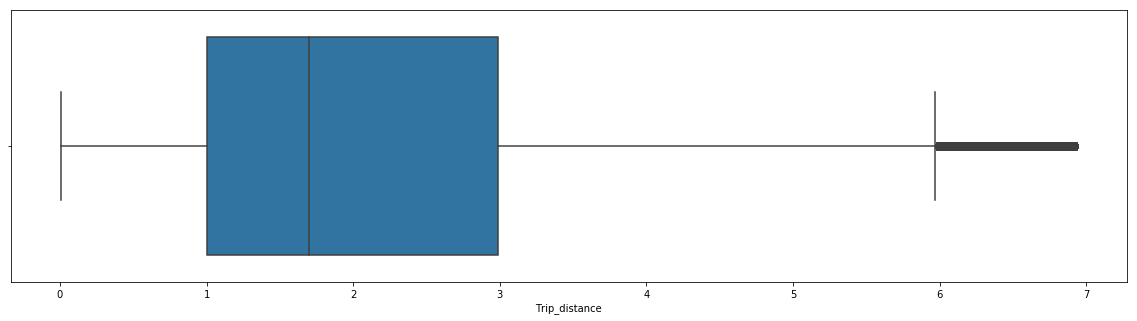

In [53]:
boxplt('Trip_distance')

In [ ]:
#['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'Pickup_longitude',
#       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
#       'Passenger_count', 'Trip_distance', 'Payment_type', 'Final_Fare_amount',
#       'Trip_Duration'],
#      dtype='object')

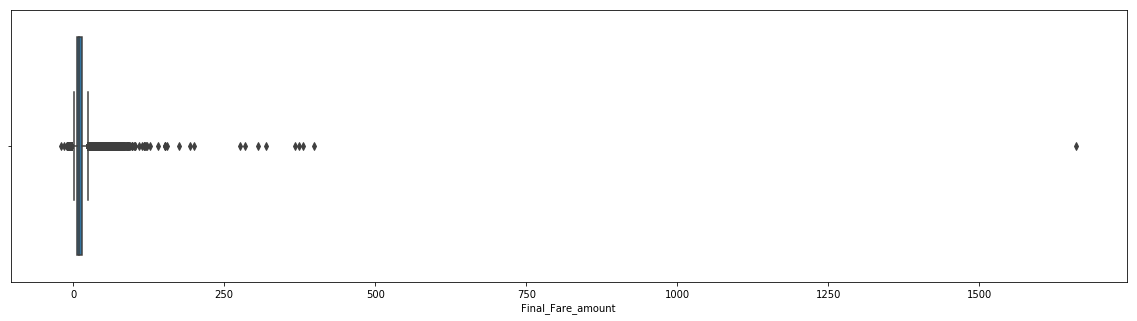

In [54]:
boxplt('Final_Fare_amount')

In [55]:
Green_Taxi= quntile('Final_Fare_amount')


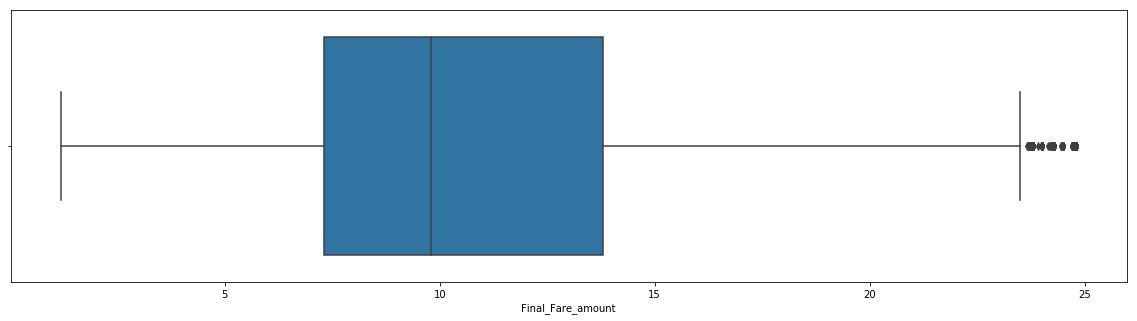

In [56]:
boxplt('Final_Fare_amount')

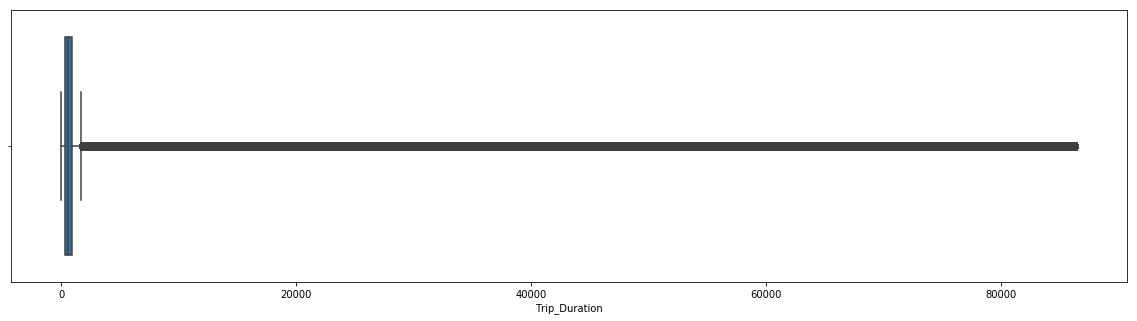

In [57]:
boxplt('Trip_Duration')

In [58]:
Green_Taxi= quntile('Trip_Duration')

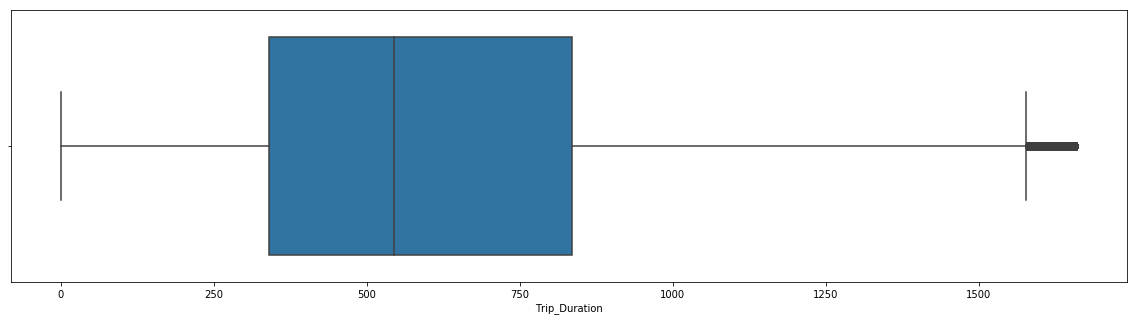

In [59]:
boxplt('Trip_Duration')

In [60]:
Green_Taxi.shape

(7130362, 11)

In [ ]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B4.csv',index=False)


<b>Starting a new Phase

In [ ]:
Green_Taxi = pd.read_csv(location+'Green_Taxi_B4.csv')#,date_parser=dateparse)


In [61]:
Green_Taxi.iloc[:, 0:2] = Green_Taxi.iloc[:, 0:2].apply(pd.to_datetime, format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
Green_Taxi['Trip_Duration'] = (Green_Taxi['Lpep_dropoff_datetime'] - Green_Taxi['lpep_pickup_datetime'])
Green_Taxi['Trip_Duration'] = Green_Taxi['Trip_Duration']/np.timedelta64(1,'s')


In [62]:
Green_Taxi[:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8,1179.0


To ensure a higher accuracy we will re-calculate the traveled distance using our own function as well and compare the results

In [63]:
from haversine import haversine

def calc_distance(df):
    pickup = (df['Pickup_latitude'], df['Pickup_longitude'])
    drop = (df['Dropoff_latitude'], df['Dropoff_longitude'])
    return haversine(pickup, drop)


In [64]:
#Calculate distance and assign new column to the dataframe.
Green_Taxi['New_distance'] = Green_Taxi.apply(lambda x: calc_distance(x), axis = 1)


In [65]:
#7874/60/24
Green_Taxi.sort_values(by='Trip_distance', ascending = False)[:10]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration,New_distance
4571365,2016-04-01 19:10:51,2016-04-01 19:30:29,-73.895233,40.746361,-73.831360,40.742752,1,6.93,2,23.8,1178.0,5.395908
767467,2016-01-16 23:00:53,2016-01-16 23:18:34,-73.957314,40.728222,-73.996246,40.681389,3,6.93,1,22.8,1061.0,6.155448
354337,2016-01-08 17:16:08,2016-01-08 17:29:56,-73.867012,40.734764,-73.919250,40.772243,1,6.93,2,21.8,828.0,6.060534
2217088,2016-02-15 21:01:56,2016-02-15 21:19:38,-73.863892,40.732960,-73.962051,40.720589,1,6.93,1,23.3,1062.0,8.385226
2224435,2016-02-16 04:21:13,2016-02-16 04:40:35,-73.949486,40.724209,-73.872955,40.774403,1,6.93,1,24.8,1162.0,8.527143
3084834,2016-03-03 18:04:37,2016-03-03 18:26:30,-73.807755,40.700428,-73.742088,40.681442,1,6.93,1,24.8,1313.0,5.925310
771511,2016-01-17 00:02:47,2016-01-17 00:20:17,-73.913177,40.743896,-73.811058,40.728703,3,6.93,2,23.3,1050.0,8.768364
1226927,2016-01-28 05:37:58,2016-01-28 05:52:18,-73.929916,40.756443,-73.989395,40.710194,3,6.93,2,22.3,860.0,7.180775
7202251,2016-05-22 14:30:51,2016-05-22 14:47:53,-73.940536,40.851418,-73.943199,40.847507,1,6.93,1,22.8,1022.0,0.489072
8410360,2016-06-08 22:01:57,2016-06-08 22:16:02,-73.916870,40.761543,-73.848633,40.724758,1,6.93,1,21.8,845.0,7.055400


In [66]:
Green_Taxi['month'] = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.month)
Green_Taxi['week']  = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.week)
Green_Taxi['day']   = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.day)
Green_Taxi['hour']  = Green_Taxi.lpep_pickup_datetime.apply(lambda x: x.hour)


In [67]:
Green_Taxi[:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration,New_distance,month,week,day,hour
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0,1.973094,1,53,1,0
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8,1179.0,4.890321,1,53,1,0


In [ ]:
# We thought of creating a new Feature (Speed) that we can use to remove more outtliers and get better results in our model

In [68]:
Green_Taxi['speed']=Green_Taxi['New_distance']/(Green_Taxi['Trip_Duration']/(60*60))

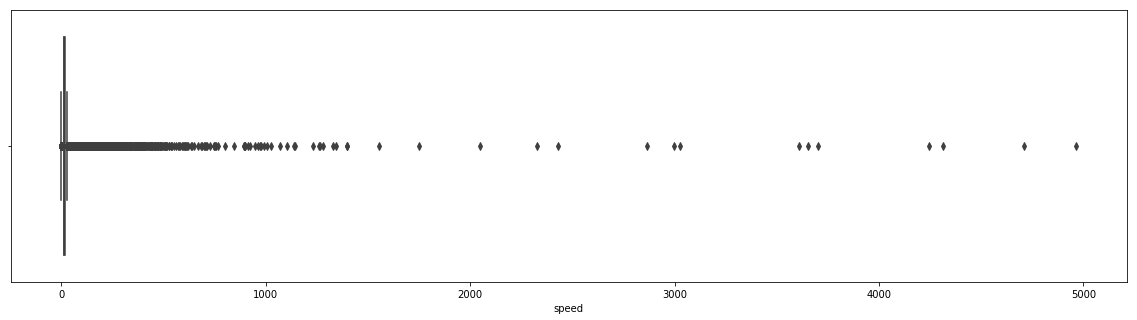

In [69]:
boxplt('speed')

In [70]:
Green_Taxi= quntile('speed')

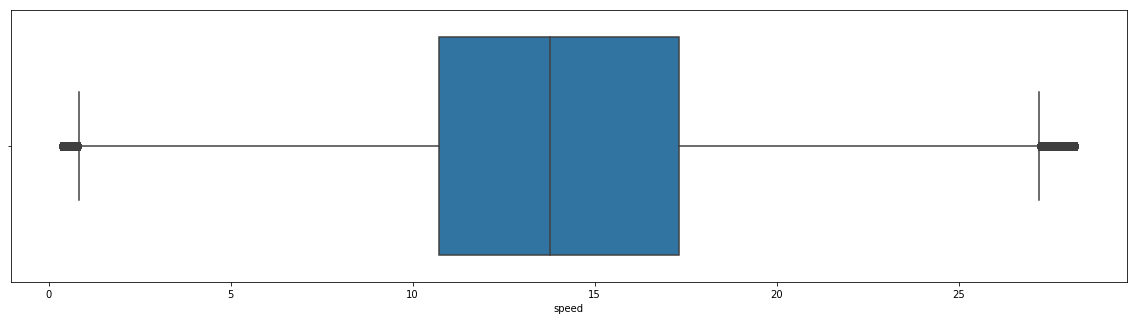

In [71]:
boxplt('speed')

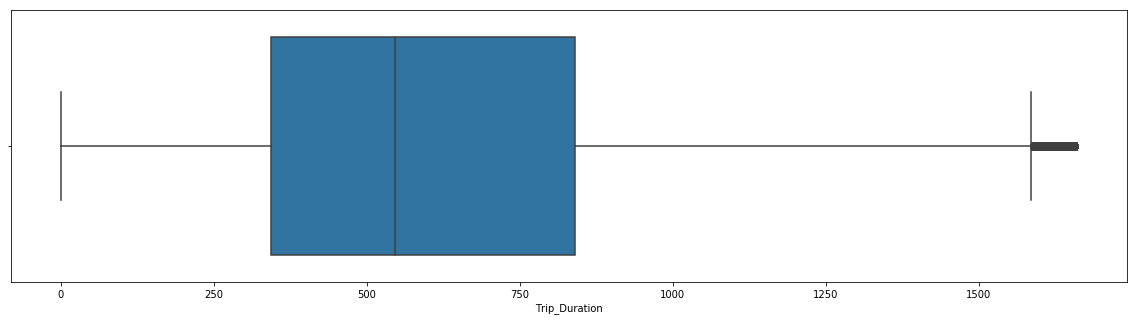

In [72]:
boxplt('Trip_Duration')

In [73]:
Green_Taxi[:2]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration,New_distance,month,week,day,hour,speed
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0,1.973094,1,53,1,0,11.606436
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8,1179.0,4.890321,1,53,1,0,14.932278


In [74]:
(Green_Taxi['Trip_Duration']/60/60).describe()

count    6.876802e+06
mean     1.731121e-01
std      9.853449e-02
min      2.777778e-04
25%      9.555556e-02
50%      1.516667e-01
75%      2.336111e-01
max      4.608333e-01
Name: Trip_Duration, dtype: float64

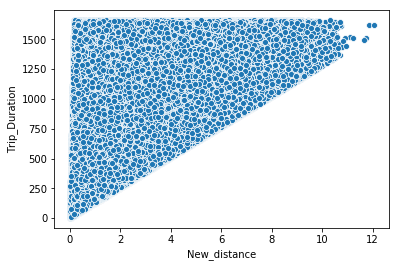

In [75]:
# Let's try to plot the distance and the duration to see if there is any good relation
sns.scatterplot(x='New_distance',y='Trip_Duration',data=Green_Taxi)


In [76]:
# Let's try to make some feature engineering to the distance and trip duration and see if that would create a better relationship
Green_Taxi['log_New_distance']=np.log(Green_Taxi.New_distance)
Green_Taxi['log_Trip_Duration']=np.log(Green_Taxi.Trip_Duration)

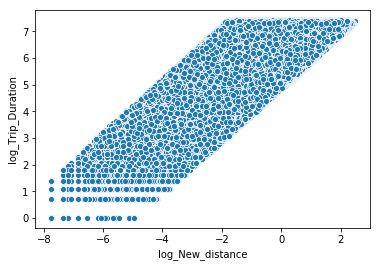

In [77]:
# Lets plot the new created columns and see if there are any changes
sns.scatterplot(x='log_New_distance',y='log_Trip_Duration',data=Green_Taxi)


In [78]:
# We can see a difference now

In [ ]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B5.csv',index=False)


In [79]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map


In [85]:
# Let's try to see how the traffic looks like with the heatmap
import folium
from folium.plugins import HeatMap
df_copy = Green_Taxi[Green_Taxi.month>4].copy()
df_copy['count'] = 1
data=df_copy[['Pickup_latitude', 'Pickup_longitude', 'count']].groupby(['Pickup_latitude', 'Pickup_longitude']).sum().reset_index().values.tolist()


In [87]:
base_map = generateBaseMap()
HeatMap(data, radius=8, max_zoom=13).add_to(base_map)

In [88]:
base_map = base_map.add_child(folium.ClickForMarker(popup='Potential Location'))

In [89]:
base_map.save('HeatMap.html')


<b>NOTE:</b> For the HeatMapWithTime to work you have to update folium and you have to choose a sample of the dataset not a high number of records. Example Month = 6 and day = 8

In [95]:
m = 6
d = 8

df_copy_Time = Green_Taxi[(Green_Taxi['month'] == m) & (Green_Taxi['day'] == d)]

In [97]:
df_hour_list = []
for hour in df_copy_Time.hour.sort_values().unique():
    df_hour_list.append(df_copy_Time.loc[df_copy_Time.hour == hour, ['Pickup_latitude', 'Pickup_longitude', 'count']].groupby(['Pickup_latitude', 'Pickup_longitude']).sum().reset_index().values.tolist())


In [100]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)


In [101]:
base_map.save('HeatMapWithTime.html')


<b> More Data Preparation and Cleaning<br><br>

In [ ]:
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"

In [ ]:
Green_Taxi = pd.read_csv(location+'Green_Taxi_B5.csv')#,date_parser=dateparse)

In [ ]:
Green_Taxi = Green_Taxi.drop(columns=['lpep_pickup_datetime','Lpep_dropoff_datetime','Payment_type'])


In [102]:
Green_Taxi.shape

(6876802, 19)

In [103]:
Green_Taxi[:5]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration,New_distance,month,week,day,hour,speed,log_New_distance,log_Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.928642,40.680611,-73.924278,40.698044,1,1.46,1,9.3,612.0,1.973094,1,53,1,0,11.606436,0.679603,6.416732
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.952675,40.723175,-73.923920,40.761379,1,3.56,2,16.8,1179.0,4.890321,1,53,1,0,14.932278,1.587258,7.072422
2,2016-01-01 00:19:33,2016-01-01 00:39:48,-73.971611,40.676105,-74.013161,40.646072,1,3.79,1,17.8,1215.0,4.841026,1,53,1,0,14.343780,1.577127,7.102499
3,2016-01-01 00:22:12,2016-01-01 00:38:32,-73.989502,40.669579,-74.000648,40.689034,1,3.01,2,14.8,980.0,2.358678,1,53,1,0,8.664531,0.858101,6.887553
4,2016-01-01 00:24:01,2016-01-01 00:39:22,-73.964729,40.682854,-73.940720,40.663013,1,2.55,2,13.3,921.0,2.994511,1,53,1,0,11.704930,1.096781,6.825460


In [104]:
Green_Taxi['Pickup_longitude'].nlargest(3)

3679793   -71.059761
5958304   -72.878510
253453    -73.041039
Name: Pickup_longitude, dtype: float64

In [105]:
Green_Taxi['Pickup_longitude'].nsmallest(400)

1474968   -115.190063
2312723   -115.188599
2220628   -115.187881
2161725   -115.187874
1532437   -115.182495
1203040   -115.181305
1716922   -115.181046
1762996   -115.178513
2112266   -115.178062
2175211   -115.178047
2223166   -115.177948
2345330   -115.177826
2476123   -115.177818
1876218   -115.177750
2218702   -115.177666
1686997   -115.177650
2209022   -115.177628
1421729   -115.177605
1411373   -115.177559
1988084   -115.177528
1772388   -115.177467
1837826   -115.177437
1759946   -115.177063
1766145   -115.177032
2222190   -115.176987
2300667   -115.176842
1911377   -115.176796
1528590   -115.176514
2312720   -115.176353
1443798   -115.175995
1760751   -115.175735
2310357   -115.175682
1924884   -115.175507
1384823   -115.175385
2300666   -115.175346
2311790   -115.175293
1672734   -115.175148
2178045   -115.175133
1441861   -115.175102
1447504   -115.175041
1740698   -115.175018
1760753   -115.174980
1724282   -115.174911
1839759   -115.174858
2476124   -115.174850
1985514   

<b>We have noticed that there are some wrong coordinates in the dataset so we will remove them</b><br><br>

In [106]:
# So by experience we know that the range of cooridinates of NYC so we will remove the invalid one 
Green_Taxi = Green_Taxi[Green_Taxi['Pickup_longitude'] > -78]


In [107]:
Green_Taxi['Pickup_latitude'].nlargest(3)

3679793    42.350266
7373602    41.136761
7274395    41.100456
Name: Pickup_latitude, dtype: float64

In [108]:
Green_Taxi['Pickup_latitude'].nsmallest(3)

2579096    39.362595
8395309    39.927956
2195849    39.954098
Name: Pickup_latitude, dtype: float64

In [109]:
Green_Taxi['Dropoff_longitude'].nlargest(3)

3679793   -71.095291
5958304   -72.876060
7560770   -73.089302
Name: Dropoff_longitude, dtype: float64

In [ ]:
Green_Taxi['Dropoff_longitude'].nsmallest(3)

In [110]:
Green_Taxi['Dropoff_latitude'].nlargest(3)

3679793    42.348770
7373602    41.136478
7274395    41.094273
Name: Dropoff_latitude, dtype: float64

In [111]:
Green_Taxi['Dropoff_latitude'].nsmallest(3)

2579096    39.361252
8395309    39.930435
2195849    39.954029
Name: Dropoff_latitude, dtype: float64

<b>Looks better now

<b>Now get only the first 4 digits after the . for the coordinates "</b><br><br>

In [113]:
Green_Taxi['Pickup_longitude'] = Green_Taxi['Pickup_longitude'].round(3)
Green_Taxi['Pickup_latitude'] = Green_Taxi['Pickup_latitude'].round(3)
Green_Taxi['Dropoff_longitude'] = Green_Taxi['Dropoff_longitude'].round(3)
Green_Taxi['Dropoff_latitude'] = Green_Taxi['Dropoff_latitude'].round(3)


In [ ]:
# This code is to do Truncation for the Float records in Python, however we did rounding instead in the previous step

#Green_Taxi['Pickup_longitude'] = Green_Taxi['Pickup_longitude'].astype(str).str[0:7].astype(np.float)
#Green_Taxi['Pickup_latitude'] = Green_Taxi['Pickup_latitude'].astype(str).str[0:6].astype(np.float)
#Green_Taxi['Dropoff_longitude'] = Green_Taxi['Dropoff_longitude'].astype(str).str[0:7].astype(np.float)
#Green_Taxi['Dropoff_latitude'] = Green_Taxi['Dropoff_latitude'].astype(str).str[0:6].astype(np.float)


In [114]:
Green_Taxi[:5]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration,New_distance,month,week,day,hour,speed,log_New_distance,log_Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.929,40.681,-73.924,40.698,1,1.46,1,9.3,612.0,1.973094,1,53,1,0,11.606436,0.679603,6.416732
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.953,40.723,-73.924,40.761,1,3.56,2,16.8,1179.0,4.890321,1,53,1,0,14.932278,1.587258,7.072422
2,2016-01-01 00:19:33,2016-01-01 00:39:48,-73.972,40.676,-74.013,40.646,1,3.79,1,17.8,1215.0,4.841026,1,53,1,0,14.343780,1.577127,7.102499
3,2016-01-01 00:22:12,2016-01-01 00:38:32,-73.990,40.670,-74.001,40.689,1,3.01,2,14.8,980.0,2.358678,1,53,1,0,8.664531,0.858101,6.887553
4,2016-01-01 00:24:01,2016-01-01 00:39:22,-73.965,40.683,-73.941,40.663,1,2.55,2,13.3,921.0,2.994511,1,53,1,0,11.704930,1.096781,6.825460


In [116]:
# After discussing with the professor he didn't recommend to use the (haversine) as it brings the distance as between two points 
# on a sphere given their longitudes and latitudes. So we will use the givin distance instead and will use google APIs in the
# Integrated code to bring the usere distance input value through it instead.

Green_Taxi.drop(columns =['New_distance'], inplace = True) 


In [117]:
Green_Taxi[:5]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration,month,week,day,hour,speed,log_New_distance,log_Trip_Duration
0,2016-01-01 00:29:24,2016-01-01 00:39:36,-73.929,40.681,-73.924,40.698,1,1.46,1,9.3,612.0,1,53,1,0,11.606436,0.679603,6.416732
1,2016-01-01 00:19:39,2016-01-01 00:39:18,-73.953,40.723,-73.924,40.761,1,3.56,2,16.8,1179.0,1,53,1,0,14.932278,1.587258,7.072422
2,2016-01-01 00:19:33,2016-01-01 00:39:48,-73.972,40.676,-74.013,40.646,1,3.79,1,17.8,1215.0,1,53,1,0,14.343780,1.577127,7.102499
3,2016-01-01 00:22:12,2016-01-01 00:38:32,-73.990,40.670,-74.001,40.689,1,3.01,2,14.8,980.0,1,53,1,0,8.664531,0.858101,6.887553
4,2016-01-01 00:24:01,2016-01-01 00:39:22,-73.965,40.683,-73.941,40.663,1,2.55,2,13.3,921.0,1,53,1,0,11.704930,1.096781,6.825460


<b><br>We will check if the number of passangers impact the Fare amount</b><br><br>

In [118]:
Green_Taxi[(Green_Taxi['Pickup_longitude'] ==-73.958) & (Green_Taxi['Pickup_latitude']  == 40.730) &
          (Green_Taxi['Dropoff_longitude'] ==-73.943) & (Green_Taxi['Dropoff_latitude'] == 40.717) &
          (Green_Taxi['Trip_distance'] == 1.50)]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Payment_type,Final_Fare_amount,Trip_Duration,month,week,day,hour,speed,log_New_distance,log_Trip_Duration
114513,2016-01-03 00:11:25,2016-01-03 00:20:17,-73.958,40.73,-73.943,40.717,4,1.5,1,9.3,532.0,1,53,3,0,12.652362,0.625798,6.276643
6002281,2016-04-29 20:07:00,2016-04-29 20:15:05,-73.958,40.73,-73.943,40.717,1,1.5,1,9.3,485.0,4,17,29,20,14.196578,0.648461,6.184149


In [119]:
Green_Taxi['Passenger_count'].corr(Green_Taxi['Final_Fare_amount'])


0.017606474551642725

<b><br>As we can see above  the number of passangers does not highly impact the Fare amount so we can drop the Passenger_count column</b><br><br>

In [120]:
Green_Taxi.drop(columns =['Passenger_count','log_New_distance','log_Trip_Duration','speed','lpep_pickup_datetime','Lpep_dropoff_datetime','Payment_type'], inplace = True)


In [ ]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B6.csv',index=False)


In [7]:
Green_Taxi.shape

(6776913, 11)

<b>Calculating Average distance by grouping coordiates<br><br>


In [8]:
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"

In [3]:
Green_Taxi = pd.read_csv(location+'Green_Taxi_B6.csv')#,date_parser=dateparse)


In [4]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,Final_Fare_amount,Trip_Duration,month,week,day,hour
0,-73.929,40.681,-73.924,40.698,1.46,9.3,612.0,1,53,1,0
1,-73.953,40.723,-73.924,40.761,3.56,16.8,1179.0,1,53,1,0


In [6]:
Green_Taxi.shape

(6776913, 11)

<b>As we will try to minimize the number of records to fit in our model so it wouldn't take too long to run, so we will group records by coordiates and timestamp  


In [8]:
Green_Taxi = pd.DataFrame(Green_Taxi.groupby(['Pickup_longitude','Pickup_latitude', 'Dropoff_longitude','Dropoff_latitude','month',
                   'week','day','hour']).mean().reset_index().values.tolist(),
                             columns=['Pickup_longitude','Pickup_latitude', 'Dropoff_longitude','Dropoff_latitude','month',
                   'week','day','hour','Trip_distance','Final_Fare_amount','Trip_Duration'])


In [9]:
# Change to trip time to minutes instead of secounds
Green_Taxi['Trip_Duration'] = Green_Taxi['Trip_Duration']/60

In [11]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration
0,-75.231,39.928,-75.227,39.930,6.0,23.0,8.0,20.0,0.25,4.3,1.116667
1,-75.165,39.954,-75.165,39.954,2.0,7.0,15.0,12.0,0.20,3.3,0.700000


In [12]:
Green_Taxi.shape

(6743363, 11)

In [19]:
# Not a big difference when we used average but it was worth trying anyway
6776913 - 6743363

33550

In [18]:
# We dropped some columns before but we discovered they might be requried in the ML models

In [28]:
Green_Taxi['speed']=Green_Taxi['Trip_distance']/(Green_Taxi['Trip_Duration']/60)


In [29]:
Green_Taxi['log_Trip_distance']=np.log(Green_Taxi.Trip_distance)


In [30]:
Green_Taxi['log_Trip_Duration'] = np.log(Green_Taxi.Trip_Duration)


In [32]:
Green_Taxi['log_Trip_Duration'] = Green_Taxi['log_Trip_Duration'].round(2)
Green_Taxi['speed'] = Green_Taxi['speed'].round(2)
Green_Taxi['log_Trip_distance'] = Green_Taxi['log_Trip_distance'].round(2)
Green_Taxi['Trip_Duration'] = Green_Taxi['Trip_Duration'].round(2)


In [33]:
Green_Taxi.head()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
0,-75.231,39.928,-75.227,39.930,6.0,23.0,8.0,20.0,0.25,4.3,1.12,13.43,-1.39,0.11
1,-75.165,39.954,-75.165,39.954,2.0,7.0,15.0,12.0,0.20,3.3,0.70,17.14,-1.61,-0.36
2,-74.466,40.368,-74.444,40.416,1.0,4.0,25.0,16.0,3.70,20.8,19.27,11.52,1.31,2.96
3,-74.422,39.363,-74.421,39.361,2.0,8.0,22.0,22.0,3.30,16.3,18.53,10.68,1.19,2.92
4,-74.285,40.519,-74.293,40.521,4.0,15.0,16.0,7.0,0.52,4.8,2.83,11.01,-0.65,1.04


In [36]:
# Ensure no null records
Green_Taxi= Green_Taxi.dropna()


In [ ]:
Green_Taxi.to_csv(r'E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/Green_Taxi_B7.csv', index=False)

In [5]:
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"
Green_Taxi = pd.read_csv(location+'Green_Taxi_B7.csv')#,date_parser=dateparse)


In [37]:
# There are several machine learning models that we would like to create.
# one to predict the distance
# one to predict the Final_Fare_amount
# one to predict the Trip_Duration

# To increase accuracy, we will provide the user predictions based on the nearest let the user coordinates 



feature_names = ['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance','log_Trip_distance','month','week','day','hour']

X = Green_Taxi[feature_names]#.values.reshape(-1,1)
y = Green_Taxi['Trip_Duration']


In [ ]:
# We can use other ways to do feature engineering like the Pvalues


In [38]:
X[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance,log_Trip_distance,month,week,day,hour
0,-75.231,39.928,-75.227,39.930,0.25,-1.39,6.0,23.0,8.0,20.0
1,-75.165,39.954,-75.165,39.954,0.20,-1.61,2.0,7.0,15.0,12.0


In [39]:
Green_Taxi.shape

(6743363, 14)

<br><b>We try to see if there is more features we can remove through PVALUE<br><br>

In [40]:
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = X).fit()


In [41]:
#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05


In [42]:
### Very important to read as the X_opt will be later used with the below command
### X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_opt,Y, random_state=4, test_size=0.2)

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
else:
    print ('no Feature index removed')
    
print("Final stat summary with optimal features")
regressor_OLS.summary()


no Feature index removed
Final stat summary with optimal features


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Trip_Duration   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 9.153e+06
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        02:40:18   Log-Likelihood:            -1.7233e+07
No. Observations:             6743363   AIC:                         3.447e+07
Df Residuals:                 6743353   BIC:                         3.447e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pickup_longitude      2.4875      0.054     46.047      0.000       2.382       2.593
Pickup_latitude       2.5372      0.063     40.273      0.000       2.414       2.661
Dropoff_longitude    -4.4306      0.054    -81.862      0.000      -4.537      -4.325
Dropoff_latitude     -5.9670      0.062    -95.637      0.000      -6.089      -5.845
Trip_distance         2.1539      0.002   1015.838      0.000       2.150       2.158
log_Trip_distance     2.9631      0.004    735.362      0.000       2.955       2.971
month                 0.1153      0.001    119.534      0.000       0.113       0.117
week                 -0.0145      0.000    -79.085      0.000      -0.015      -0.014
day                   0.0018      0.000     13.152      0.000       0.002       0.002
hour                  0.0347      0.000    191.410      0.000       0.034       0.035
==============================================================================
Omnibus:                  1230391.798   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3294999.024
Skew:                           0.992   Prob(JB):                         0.00
Kurtosis:                       5.791   Cond. No.                     9.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
#Finally we have reached the combination of optimum features with each feature having p value < 0.05.


<img align="left" src="Working_Code_Images/machine_learning2.png" style="height:200px"> 


<b><font color="Blue">Modeling</font></u></b><br>- Create different regression models <br>- Calculate the Trip Duration<br>- Calculate the Trip Fare

<b>We will each of our models with PCA and without PCA

<u> Principal Component Analysis

In [57]:
#Split Data
#Lets split our data first before scaling the features
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,y, random_state=4, test_size=0.2)


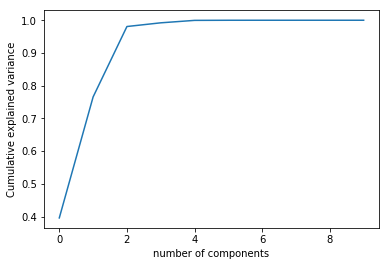

In [58]:
#Let's apply PCA technique on the training features to understand how many principal components

from sklearn.decomposition import PCA
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()


In [59]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 39.58),
 (2, 76.56),
 (3, 98.09),
 (4, 99.22),
 (5, 99.97),
 (6, 100.01),
 (7, 100.01),
 (8, 100.01),
 (9, 100.01)]

<b> PCA dosent look promissing to use only 3 to 4 components would do the job, so let's try to use
standard scaler and see the result and avoid the bias

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

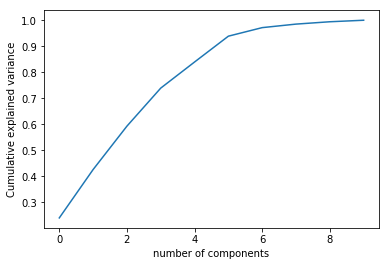

In [61]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()


<b> We can use up to 9 components now

In [62]:
# Let's list the PCA percentage 
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))


[(1, 24.02),
 (2, 42.61),
 (3, 59.29),
 (4, 73.91),
 (5, 83.94),
 (6, 93.87),
 (7, 97.15),
 (8, 98.5),
 (9, 99.4)]

In [63]:
# We will use 9 components as suggested
pca_9 = PCA(n_components=9)
X_train_pca = pca_9.fit_transform(X_train_pca)
X_test_pca = pca_9.transform(X_test_pca)


<b> Let's start building our Machine Learning Models now

In [85]:
#from sklearn.preprocessing import MinMaxScaler
# Splitting the normal features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#scaler = MinMaxScaler()
#X_test = scaler.fit_transform(X_test)

In [86]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
#Linear regressor for the Feature extraction group
regressor_PCA = LinearRegression() 
regressor_PCA.fit(X_train_pca,y_train_pca)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
y_pred = regressor.predict(X_test)
y_pred_pca = regressor_PCA.predict(X_test_pca) 


In [88]:
from sklearn import metrics
#Evaluate the regressor on the raw data
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE score for the Multiple LR raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Variance score for the Multiple LR raw is : %.2f' % regressor.score(X_test, y_test))
print("\n")

#Evaluate the regressor on the Feature extraction group
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_pca,y_pred_pca))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_pca,y_pred_pca))
print('RMSE score for the Multiple LR PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca,y_pred_pca))))
print('Variance score for the Multiple LR PCA is : %.2f' % regressor_PCA.score(X_test_pca, y_test_pca))
print("\n")

Mean Absolute Error: 2.268987783633049
Mean Squared Error: 9.659857550901489
RMSE score for the Multiple LR raw is : 3.10803113737644
Variance score for the Multiple LR raw is : 0.72


Mean Absolute Error: 2.273788324453341
Mean Squared Error: 9.705968174159425
RMSE score for the Multiple LR PCA is : 3.1154402857637034
Variance score for the Multiple LR PCA is : 0.72




<B>We will now try to improve our accuraccy so we will try the below on different models:</B>
    <br>1. Cross Validation
    <br>2. Grid Search
    <br>3. Different algorithms
    <br>4. Ensemble learning


In [94]:
from sklearn.linear_model import RidgeCV
regressor = RidgeCV(alphas=[0.01,0.1,1, 1e3, 1e6], store_cv_values=True)
regressor_PCA = RidgeCV(alphas=[0.01,0.1,1, 1e3, 1e6], store_cv_values=True)


In [95]:
regressor.fit(X_train, y_train)
regressor_PCA.fit(X_test_pca, y_test_pca)


RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+03, 1.e+06]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

In [96]:
# Best alpha
print(regressor.alpha_)
print(regressor_PCA.alpha_)


1.0
1.0


Best alpha for both is with value 1

In [101]:
cv_mse_R = np.mean(regressor.cv_values_, axis=0)
print('Mean Squared Error:', cv_mse_R)


Mean Squared Error: [ 9.68143309  9.68143309  9.68143309  9.68368279 10.01938202]


In [102]:
cv_mse_PCA = np.mean(regressor_PCA.cv_values_, axis=0)
print('Mean Squared Error:', cv_mse_PCA)


Mean Squared Error: [ 9.70591711  9.70591711  9.70591711  9.70592206 11.66996047]


In [103]:
print('Root Mean Squared Error:', np.sqrt(cv_mse_R))
print('Root Mean Squared Error PCA:', np.sqrt(cv_mse_PCA))


Root Mean Squared Error: [3.11150014 3.11150014 3.11150013 3.11186163 3.16534074]
Root Mean Squared Error PCA: [3.11543209 3.11543209 3.11543209 3.11543288 3.41613238]


In [100]:
predict_z = regressor.predict(X_test)

<br>
<b>Let's try Ensemble learning random forest regressor and see the result<br><br>

In [104]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_jobs=-1)
regressor_rf.fit(X_train, y_train)

regressor_rf_PCA = RandomForestRegressor(n_jobs=-1)
regressor_rf_PCA.fit(X_train_pca, y_train_pca)

print("\n")

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [105]:
y_pred_rf = regressor_rf.predict(X_test)
y_pred_rf_PCA = regressor_rf_PCA.predict(X_test_pca)

print("\n")


In [106]:
#Evaluate the model with default RF
print('RMSE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))))
print('RMSLE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_rf))))
print('Variance score for the RF regressor raw is : %.2f' % regressor_rf.score(X_test, y_test))

print("\n")

#Evaluate the model with Random Forest PCA
print('RMSE score for the RF regressor PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_rf_PCA))))
print('RMSLE score for the RF regressor PCA is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test_pca, y_pred_rf_PCA))))
print('Variance score for the RF regressor PCA is : %.2f' % regressor_rf_PCA.score(X_test_pca, y_test_pca))

RMSE score for the RF regressor raw is : 2.5035009515020583
RMSLE score for the RF regressor raw is : 0.21962233601016729
Variance score for the RF regressor raw is : 0.82


RMSE score for the RF regressor PCA is : 2.5935417796645814
RMSLE score for the RF regressor PCA is : 0.22806418671301565
Variance score for the RF regressor PCA is : 0.81


*****************
<b> Let's try working with Boosters as well </b>
<br>
*****************

In [107]:
# XGBoost Regressor
# We used GridSearch to tune the hyperparameters of XGBoost regressor to get the best possible test score.
# We will compare results from the default regressor and the tuned regressor.
from xgboost import XGBRegressor

In [108]:
regressor_xgb = XGBRegressor(n_jobs=-1)
regressor_xgb_PCA = XGBRegressor(n_estimators=300,
                            learning_rate=0.08,
                            gamma=0,
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7,
                            min_child_weight=4,
                            silent=1,
                           n_jobs=-1)


In [109]:
regressor_xgb.fit(X_train,y_train)
regressor_xgb_PCA.fit(X_train_pca,y_train_pca)
print("\n")


C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[03:57:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:56] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.




In [110]:
y_pred_xgb = regressor_xgb.predict(X_test)
y_pred_xgb_pca = regressor_xgb_PCA.predict(X_test_pca)
print("\n")


In [113]:
#Evaluate the model with default params for raw data
print('RMSE score for the XGBoost regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb))))
print('Variance score for the XGBoost regressor raw is : %.2f' % regressor_xgb.score(X_test, y_test))
print("\n")

#Evaluate the model with PCA params  for Feature Extraction Group
print('RMSE score for the XGBoost regressor PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_xgb_pca))))
print('Variance score for the XGBoost regressor PCA is : %.2f' % regressor_xgb_PCA.score(X_test_pca, y_test_pca))


RMSE score for the XGBoost regressor raw is : 2.752566072576734
Variance score for the XGBoost regressor raw is : 0.78


RMSE score for the XGBoost regressor PCA is : 2.5591016770544126
Variance score for the XGBoost regressor PCA is : 0.81


<b><br>Next step to do the same for the Trip Fare Prediction</b><br><br>
    <br>


In [115]:
#feature_names = ['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance','speed','log_New_distance','log_Trip_Duration','month','week','day','hour']
feature_names = ['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance','log_Trip_distance','month','week','day','hour']

X = Green_Taxi[feature_names]#.values.reshape(-1,1)
Z = Green_Taxi['Final_Fare_amount']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, Z, test_size=0.2, random_state=0)



In [117]:
X_train_pca, X_test_pca, z_train_pca, z_test_pca = train_test_split(X,Z, random_state=4, test_size=0.2)
scaler = StandardScaler()

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

In [118]:
from sklearn.linear_model import RidgeCV
regressor = RidgeCV(alphas=[0.01,0.1,1, 1e3, 1e6], store_cv_values=True)
regressor_pca = RidgeCV(alphas=[0.01,0.1,1, 1e3, 1e6], store_cv_values=True)

regressor.fit(X_train, z_train)
regressor_pca.fit(X_test_pca, z_test_pca)

RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 1.e+03, 1.e+06]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

In [120]:
# Best alpha
print(regressor.alpha_)
print(regressor_pca.alpha_)

1.0
0.1


In [122]:
cv_mse_R = np.mean(regressor.cv_values_, axis=0)
print('Mean Squared Error:', cv_mse_R)

cv_mse_PCA = np.mean(regressor_pca.cv_values_, axis=0)
print('Mean Squared Error:', cv_mse_PCA)


Mean Squared Error: [1.63456268 1.63456268 1.63456268 1.63470887 1.74821492]
Mean Squared Error: [1.63747265 1.63747265 1.63747265 1.63750167 3.32573145]


In [123]:
print('Root Mean Squared Error:', np.sqrt(cv_mse_R))
print('Root Mean Squared Error PCA:', np.sqrt(cv_mse_PCA))

Root Mean Squared Error: [1.27850017 1.27850017 1.27850017 1.27855734 1.32220079]
Root Mean Squared Error PCA: [1.2796377  1.2796377  1.2796377  1.27964904 1.82365881]


In [124]:
predict_z = regressor.predict(X_test)


In [125]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_jobs=-1)

#instantiate the object for the Random Forest Regressor for Feature Extraction Group
regressor_rf_PCA = RandomForestRegressor(n_jobs=-1)

regressor_rf.fit(X_train, z_train)
regressor_rf_PCA.fit(X_train_pca, z_train_pca)

print("\n")


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [126]:
z_pred_rf = regressor_rf.predict(X_test)
z_pred_rf_PCA = regressor_rf_PCA.predict(X_test_pca)

print("\n")


In [127]:
#Evaluate the model with default RF
print('RMSE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(z_test,z_pred_rf))))
print('RMSLE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_log_error(z_test,z_pred_rf))))
print('Variance score for the RF regressor raw is : %.2f' % regressor_rf.score(X_test, z_test))

print("\n")

#Evaluate the model with Random Forest PCA
print('RMSE score for the RF regressor PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(z_test_pca, z_pred_rf_PCA))))
print('RMSLE score for the RF regressor PCA is : {}'.format(np.sqrt(metrics.mean_squared_log_error(z_test_pca, z_pred_rf_PCA))))
print('Variance score for the RF regressor PCA is : %.2f' % regressor_rf_PCA.score(X_test_pca, z_test_pca))

RMSE score for the RF regressor raw is : 1.1180454597463436
RMSLE score for the RF regressor raw is : 0.09502321151555194
Variance score for the RF regressor raw is : 0.94


RMSE score for the RF regressor PCA is : 1.1205611880771256
RMSLE score for the RF regressor PCA is : 0.09528167890600997
Variance score for the RF regressor PCA is : 0.94


<b> Using Booster</b>


In [128]:
regressor_xgb = XGBRegressor(n_jobs=-1)
regressor_xgb_PCA = XGBRegressor(n_estimators=300,
                            learning_rate=0.08,
                            gamma=0,
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7,
                            min_child_weight=4,
                            silent=1,
                           n_jobs=-1)

In [129]:
regressor_xgb.fit(X_train,z_train)
regressor_xgb_PCA.fit(X_train_pca,z_train_pca)
print("\n")


C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[06:05:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:05:12] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.




In [130]:
z_pred_xgb = regressor_xgb.predict(X_test)
z_pred_xgb_pca = regressor_xgb_PCA.predict(X_test_pca)
print("\n")

In [131]:
#Evaluate the model with default params for raw data
print('RMSE score for the XGBoost regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(z_test,z_pred_xgb))))
print('Variance score for the XGBoost regressor raw is : %.2f' % regressor_xgb.score(X_test, z_test))
print("\n")

#Evaluate the model with PCA params  for Feature Extraction Group
print('RMSE score for the XGBoost regressor PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(z_test_pca, z_pred_xgb_pca))))
print('Variance score for the XGBoost regressor PCA is : %.2f' % regressor_xgb_PCA.score(X_test_pca, z_test_pca))


RMSE score for the XGBoost regressor raw is : 1.1765481008152199
Variance score for the XGBoost regressor raw is : 0.93


RMSE score for the XGBoost regressor PCA is : 1.0481966531187332
Variance score for the XGBoost regressor PCA is : 0.94


<img align="left" src="Working_Code_Images/Evaluation.jpg" style="height:200px"> 


<b><font color="Blue">Evaluation</font></u></b><br>- The best result for the Trip duration predection was for the RF regressor raw : 2.50
<br>- The best result for the Fare amount predection was for XGBoost regressor PCA : 1.04


<img align="center" src="Working_Code_Images/Line_Separator.jpg"  style="width:40%; height: 10%"> 

<table style="width:100%"><img src="Working_Code_Images/Distance.jpg" style="height:200px">
<font color="Blue"><b>Calculating Distance</b></font>
<br>- To recap these are the required features for our input ['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance','log_Trip_distance','month','week','day','hour']<br>
<br>- Now we need to get the Trip_distance and the log_Trip_distance for our input pickup and dropout coordinates
<br>- The distance is required as an input to ensure a good accuracy for the model as it impacts the Trip durtation and the Fare amount.
<br>- There are several options and scenarios that we thought about which we will uncover in the below steps and code

- However, we have a challange here as there are several different scenarios <br>
 - <font color="red"> Scenarios 1</font>, we have the x1,y1,x2,y2 in the dataset (best case scenario) <br>
 - <font color="red"> Scenarios 2</font>, we have the x1,y1 in the dataset but x2,y2 or either one of them not <br>
 - <font color="red"> Scenarios 3</font>, we have the x2,y2 in the dataset but x1,y1 or either one of them not <br>
 - <font color="red"> Scenarios 4</font>, we have either x1,y1 not in the dataset and either x2,y2 not in the dataset <br>

    

In [30]:
# This code is just for testing to see how the results would be if the user is searching for coordinates that doesn't exist
# in our dataset
Green_Taxi[((Green_Taxi['Pickup_longitude'] == -72.422) & (Green_Taxi['Pickup_latitude'] == 39.363)) |
               ((Green_Taxi['Dropoff_longitude'] == -74.421) & (Green_Taxi['Dropoff_latitude'] == 39.362))]



,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration


<b>Option 1

- We will first try to use the Python libraries to see if it can help us with our case
- We will do that by  calculating the distance by a libarary called geopy.distance



In [31]:
# This code is to ensure that the following coordinates exist in our dataset (39.363,-74.422),(39.362,-74.421)
Green_Taxi[((Green_Taxi['Pickup_longitude'] == -74.422) & (Green_Taxi['Pickup_latitude'] == 39.363)) |
               ((Green_Taxi['Dropoff_longitude'] == -74.421) & (Green_Taxi['Dropoff_latitude'] == 39.362))]



,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
3,-74.422,39.363,-74.421,39.361,2.0,8.0,22.0,22.0,3.3,16.3,18.53,10.68,1.19,2.92


In [33]:
# Use the geopy.distance library
from geopy.distance import geodesic
geodesic((39.363,-74.422),(39.362,-74.421))


Distance(0.14054687383678083)

- We compared the result of geodesic with the distance in our dataset and we found it different  
- This is expected as the geodesic calculates the distance between two points on a sphere or other curved surface.


<b>Option 2

- We tried to think of finding the closest value for each input value but we found it hectic and the result is not granted
- See the code below it was just a test to find the closest value for X1 then Y2 separately

In [35]:
# Working
Input_verification = []
#Input_verification.append(-74.252)
# -74.252
# -74.249

if Green_Taxi['Pickup_longitude'][Green_Taxi['Pickup_longitude'] == (-74.422)].count() >0:
    print ('X1 Found')
    
else:
    if Green_Taxi['Pickup_latitude'][Green_Taxi['Pickup_latitude'] == (39.36)].count() >0:
        print ('Y1 Found')
#ew_Green_Taxi.ix[(New_Green_Taxi['Pickup_longitude']-(-74.249)).abs().argsort()[:1]]

    else:
        print(Green_Taxi.iloc[(Green_Taxi['Pickup_longitude']-(-74.421)).abs().argsort()[:1]])
        print(Green_Taxi.iloc[(Green_Taxi['Pickup_latitude']-(39.361)).abs().argsort()[:1]])

        #print('NO Result')

X1 Found


<br>
<B> Option 3 </B>
- To use google maps API on Cloud. We used google maps API in our integrated code of the overall project but we will uncover here the different scenarios that we have tried so far.<br><br>

<B> Option 4 </B>
- We will try using K Means clustering, to cluster the distance of the input coordinate to the nearest coordinates in the dataset
- To make it more easier we will limit the number of records that we will use in clustering using the plan mentioned below


- The K Means plan will be as follows:
    - We will get our cooridnates from the user X1,Y1,X2,Y2
    - Let's say the user entered the following coordinates (40.770,-74.230) and (40.765,-74.188)
    - For each of the inputs value we will get the records within the range of +1000 and -1000 of the input value
    - Optional: Limit the number of records resulted for each to be 10 
    - Put the resuting values in a new Pandas DataFrame
    - Create a Cluster with K = 6 and see the closeset
    - Plot the result and see where is the clusters and your point


In [36]:
Green_Taxi.iloc[:,:4][:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude
0,-75.231,39.928,-75.227,39.930
1,-75.165,39.954,-75.165,39.954


In [71]:
# (40.715376,-73.936037,40.700737,-73.895697)


In [37]:
Green_Taxi[Green_Taxi['Pickup_latitude']>40.715] [:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
9,-74.237,40.723,-74.228,40.726,5.0,22.0,31.0,6.0,0.79,5.8,4.20,11.29,-0.24,1.44
10,-74.230,40.770,-74.188,40.765,6.0,23.0,6.0,10.0,2.59,11.8,11.05,14.06,0.95,2.40


In [44]:
df = pd.DataFrame()
long1 = Green_Taxi.iloc[(Green_Taxi['Pickup_longitude']-(-74.230)).abs().argsort()[:2000]]
lat1 = Green_Taxi.iloc[(Green_Taxi['Pickup_latitude']-(40.770)).abs().argsort()[:2000]]
long2 = Green_Taxi.iloc[(Green_Taxi['Pickup_longitude']-(-74.188)).abs().argsort()[:2000]]
lat2 = Green_Taxi.iloc[(Green_Taxi['Pickup_latitude']-(40.765)).abs().argsort()[:2000]]


In [45]:
Green_Taxi[(Green_Taxi['Pickup_longitude'] ==-74.230)] #iloc

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
10,-74.23,40.77,-74.188,40.765,6.0,23.0,6.0,10.0,2.59,11.8,11.05,14.06,0.95,2.4


In [46]:
df = long1.append(lat1)
df = df.append(long2)
df = df.append(lat2)

In [47]:
Green_Taxi.iloc[[8]]


,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
8,-74.252,40.612,-74.253,40.613,5.0,20.0,16.0,19.0,0.04,4.3,0.9,2.67,-3.22,-0.11


In [48]:
df[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
10,-74.230,40.770,-74.188,40.765,6.0,23.0,6.0,10.0,2.59,11.8,11.05,14.06,0.95,2.40
9,-74.237,40.723,-74.228,40.726,5.0,22.0,31.0,6.0,0.79,5.8,4.20,11.29,-0.24,1.44


In [49]:
# We now have the range of the records where our target value could be close to it
df.shape

(8000, 14)

- Let's Plot our point and the range of points to see where our point is located


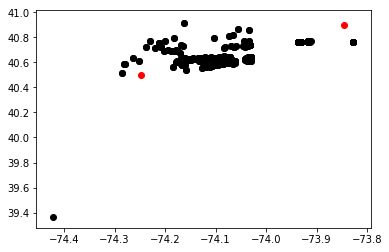

Our points are in red


In [50]:
# (40.503,-74.248, 40.903,-73.846)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

for index, row in df.iterrows():

    plt.scatter(round (row['Pickup_longitude'],6), round (row['Pickup_latitude'],6), marker='o',color='black')
    
plt.scatter(-74.248,40.503, marker='o',color='red')

plt.scatter(-73.846,40.903, marker='o',color='red')


plt.show()

print ("Our points are in red")


<br><b>- Now lets strart the clustering
<br>- Note: We will filter on latitude first as for earth 1 degree of latitude on the sphere is 111.2 km or 69 miles



In [53]:
df_Clus_features = list(df.columns)[:4]
df_Clus_features

['Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude']

In [54]:
df_Clus_Data = df[df_Clus_features]

In [55]:
df_Clus_Data[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude
10,-74.230,40.770,-74.188,40.765
9,-74.237,40.723,-74.228,40.726


In [57]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, precompute_distances="auto", n_jobs=-1)
    kmeans.fit(df_Clus_Data)
    wcss.append(kmeans.inertia_)


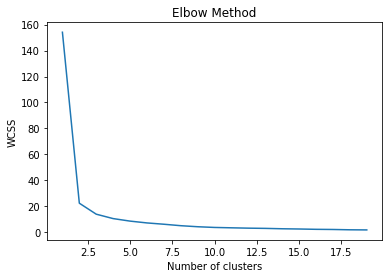

In [58]:
# We were just tring things here not an important part in our code so please ignore it
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [59]:
df_Clus_Data[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude
10,-74.230,40.770,-74.188,40.765
9,-74.237,40.723,-74.228,40.726


In [63]:
kmeans = KMeans(n_clusters=6).fit(df_Clus_Data)
centroids = kmeans.cluster_centers_
#print(centroids)

kmeans.predict([[-74.248,40.503,-73.846,40.903]])

#plt.scatter(-74.248,40.503, marker='o',color='red', s=10, alpha=0.5)
#plt.scatter(-73.846,40.903, marker='o',color='red', s=10, alpha=0.5)

array([3])

In [64]:
print(kmeans.labels_)


[4 4 4 ... 0 0 0]


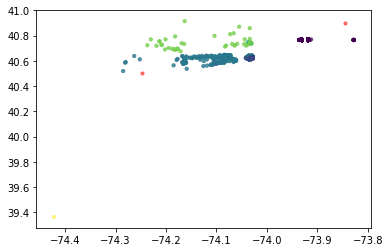

In [65]:
plt.scatter(df_Clus_Data['Pickup_longitude'], df_Clus_Data['Pickup_latitude'], c= kmeans.labels_.astype(float), s=10, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)

plt.scatter(-74.248,40.503, marker='o',color='red', s=10, alpha=0.5)
plt.scatter(-73.846,40.903, marker='o',color='red', s=10, alpha=0.5)


In [68]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_Clus_Data)


In [69]:
closest

array([7883, 1190,   93, 1616,  192,  311], dtype=int64)

<b> Option 5 <br>
    - Use Euclidean Distance with the 4 coordinates at the same time

In [90]:
#-74.248,40.503
#-73.846,40.903
#= New_Green_Taxi.iloc[(New_Green_Taxi['Pickup_longitude']-(-74.248)).abs().argsort()[:25]]

# Test
from scipy.spatial import distance
p1 = (-74.248,40.503)
p2 = (-73.846,40.903)
d = distance.euclidean(p1, p2)
print("Euclidean distance: ",d)


Euclidean distance:  0.5671014018674259


In [91]:
lookup_Table = pd.DataFrame(columns = ('Index','Euclidean'))

In [92]:
lookup_Table = pd.DataFrame(columns = ('Index','Euclidean'))
lookup_Table

,Index,Euclidean


<B>Note: In order not to take too much time we will use the dataFrame that we have previously created when we testing clustering (df_Clus_Data)

In [93]:
p1 = (-74.248,40.503,-73.846,40.903)
df3 = pd.DataFrame()

for index, row in df_Clus_Data.iterrows():
    eclud_dist = distance.euclidean(p1, row[['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude']])
    df3 = {'Index': index, 'Euclidean': eclud_dist}
    lookup_Table = lookup_Table.append(df3, ignore_index=True) 


In [77]:
ind = lookup_Table.sort_values(by=['Euclidean'])[:1]

In [94]:
ind

,Index,Euclidean
5374,2820.0,0.348698


In [95]:
ind.index.values.astype(int)[0]


5374

In [96]:
df_Clus_Data

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude
10,-74.230,40.770,-74.188,40.765
9,-74.237,40.723,-74.228,40.726
11,-74.219,40.719,-74.213,40.719
13,-74.213,40.754,-74.211,40.739
12,-74.213,40.754,-74.216,40.719
14,-74.209,40.726,-74.208,40.727
8,-74.252,40.612,-74.253,40.613
15,-74.208,40.727,-74.208,40.727
16,-74.202,40.690,-74.205,40.709
17,-74.201,40.770,-74.196,40.772


In [468]:
#-74.248, 40.503,- 73.846 ,40.903

In [97]:
New_points = df_Clus_Data.iloc[ind.index.values.astype(int)[0]]

In [98]:
New_points[['Pickup_longitude','Pickup_latitude']]

Pickup_longitude   -74.029
Pickup_latitude     40.623
Name: 2820, dtype: float64

In [99]:
# These are the closest points to our points using the Euclidean Distance
New_points

Pickup_longitude    -74.029
Pickup_latitude      40.623
Dropoff_longitude   -73.969
Dropoff_latitude     40.693
Name: 2820, dtype: float64

<B> This code is just for fun to know how the input Coordinates and the New_points from the Euclidean Distance will look in the df dataFrame that we created previously with the +1000, -1000 Range

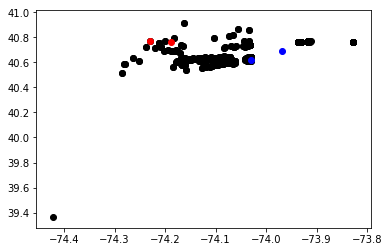

Our points are in red


In [84]:
# This code was built to see how far was the points from there nearest cluster
# We will make use 

import matplotlib.pyplot as plt

for index, row in df.iterrows():

    plt.scatter(round (row['Pickup_longitude'],6), round (row['Pickup_latitude'],6), marker='o',color='black')
    
plt.scatter(-74.230,40.770, marker='o',color='red')

plt.scatter(-74.188,40.765, marker='o',color='red')


plt.scatter(New_points['Pickup_longitude'],New_points['Pickup_latitude'], marker='o',color='blue')

plt.scatter(New_points['Dropoff_longitude'],New_points['Dropoff_latitude'], marker='o',color='blue')


plt.show()

print ("Our points are in red")

In [566]:
type(New_points)
type(New_Green_Taxi)

pandas.core.frame.DataFrame

In [104]:
# These are the points that we will calculate the distance for the user for them accordingly
Green_Taxi[(Green_Taxi['Pickup_latitude'] == New_points['Pickup_latitude']) & (Green_Taxi['Pickup_longitude'] == New_points['Pickup_longitude'])
    & (Green_Taxi['Dropoff_longitude'] == New_points['Dropoff_longitude']) & (Green_Taxi['Dropoff_latitude'] == New_points['Dropoff_latitude'])]


,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
2820,-74.029,40.623,-73.969,40.693,3.0,12.0,23.0,9.0,6.36,24.3,26.73,14.27,1.85,3.29


In [105]:
Green_Taxi.iloc[:,12:13] [(Green_Taxi['Pickup_latitude'] == New_points['Pickup_latitude']) & (Green_Taxi['Pickup_longitude'] == New_points['Pickup_longitude'])
    & (Green_Taxi['Dropoff_longitude'] == New_points['Dropoff_longitude']) & (Green_Taxi['Dropoff_latitude'] == New_points['Dropoff_latitude'])]


,log_Trip_distance
2820,1.85


In [108]:
New_points['Trip_distance'] = Green_Taxi.iloc[:,8:9][(Green_Taxi['Pickup_latitude'] == New_points['Pickup_latitude']) & (Green_Taxi['Pickup_longitude'] == New_points['Pickup_longitude'])
    & (Green_Taxi['Dropoff_longitude'] == New_points['Dropoff_longitude']) & (Green_Taxi['Dropoff_latitude'] == New_points['Dropoff_latitude'])].values

New_points['log_Trip_distance'] = Green_Taxi.iloc[:,12:13] [(Green_Taxi['Pickup_latitude'] == New_points['Pickup_latitude']) & (Green_Taxi['Pickup_longitude'] == New_points['Pickup_longitude'])
    & (Green_Taxi['Dropoff_longitude'] == New_points['Dropoff_longitude']) & (Green_Taxi['Dropoff_latitude'] == New_points['Dropoff_latitude'])].values


In [110]:
s = Green_Taxi.iloc[:,8:9][(Green_Taxi['Pickup_latitude'] == New_points['Pickup_latitude']) & (Green_Taxi['Pickup_longitude'] == New_points['Pickup_longitude'])
    & (Green_Taxi['Dropoff_longitude'] == New_points['Dropoff_longitude']) & (Green_Taxi['Dropoff_latitude'] == New_points['Dropoff_latitude'])].values


In [111]:
New_points['Trip_distance'] = s.ravel() 

In [112]:
# We will assume some points
New_points['month'] = 11 
New_points['week'] = 2
New_points['day'] =  12
New_points['hour'] =  3

#feature_names = ['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Trip_distance','log_Trip_distance','month','week','day','hour']


In [113]:
New_points

Pickup_longitude      -74.029
Pickup_latitude        40.623
Dropoff_longitude     -73.969
Dropoff_latitude       40.693
Trip_distance          [6.36]
log_Trip_distance    [[1.85]]
month                      11
week                        2
day                        12
hour                        3
Name: 2820, dtype: object

In [ ]:
regressor_xgb_PCA.predict(New_points)

In [117]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
0,-75.231,39.928,-75.227,39.930,6.0,23.0,8.0,20.0,0.25,4.3,1.12,13.43,-1.39,0.11
1,-75.165,39.954,-75.165,39.954,2.0,7.0,15.0,12.0,0.20,3.3,0.70,17.14,-1.61,-0.36


<img align="center" src="Working_Code_Images/Line_Separator.jpg"  style="width:40%; height: 10%"> 

<br><br><font color="red">The below test was requested by the Doctor to try clustering the records instead of grouping Them to see the results before we do the prediction, As we have already bulit the models we have included this trial at the end of the code to avoid confusion<br><br><br>

In [ ]:
location  = "E:/Big Data Diploma/Project/Project/New folder/Taxi/Green Taxi/"
Green_Taxi = pd.read_csv(location+'Green_Taxi_B7.csv')#,date_parser=dateparse)


In [118]:
Green_Taxi[:2]

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,month,week,day,hour,Trip_distance,Final_Fare_amount,Trip_Duration,speed,log_Trip_distance,log_Trip_Duration
0,-75.231,39.928,-75.227,39.930,6.0,23.0,8.0,20.0,0.25,4.3,1.12,13.43,-1.39,0.11
1,-75.165,39.954,-75.165,39.954,2.0,7.0,15.0,12.0,0.20,3.3,0.70,17.14,-1.61,-0.36


In [119]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [120]:
#Green_Taxi_Clus[['Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude']]
Clus_features = list(Green_Taxi.columns)[:4]
Clus_features

['Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude']

In [123]:
Clus_data = Green_Taxi[Clus_features]


In [ ]:
# Let's try to distribute the data across different number of clusters

In [124]:
wcss = []

for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, precompute_distances="auto", n_jobs=-1)
    kmeans.fit(Clus_data)
    wcss.append(kmeans.inertia_)



In [ ]:
# Let's know draw the Elbow shape to know which cluster was the best

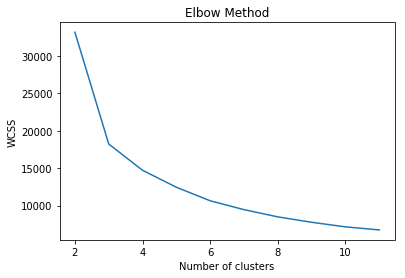

In [125]:
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


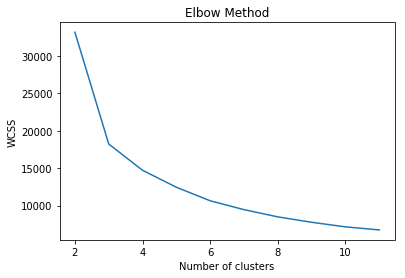

In [127]:
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


<B>Clustering the dataset wouldn't be the best option as we will all coordinates to a limited number of cluster which is not feasible in our case

 <img align="center" src="Working_Code_Images/Line_Separator.jpg"  style="width:40%; height: 10%"> 

<img align="left" src="Working_Code_Images/End.jpg"  style="width:100%"> 